## 1. Exploration et Préparation des Données

# (a) Chargement et aperçu des données



In [ ]:
# @title Importer les librairies
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
# @title Charger le dataset "Mall_Customers_modified.csv"
separateur = ","
path = "/content/Mall_Customers_modified.csv"
# Lire le fichier CSV en utilisant pandas
df = pd.read_csv(path, sep=separateur)


In [ ]:
# @title Afficher les cinq premières lignes du dataset
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,21.0,15.0,81
2,3,Female,20.0,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


## Décrire brièvement le dataset




In [ ]:
# @title Combien de colonnes et de lignes contient-il ?
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,160.000000,188.000000,200.000000
mean,100.500000,38.912500,60.531915,50.200000
std,57.879185,13.856582,26.430295,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,29.000000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# @title Quelles sont les colonnes présentes et leurs types de données?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   200 non-null    object 
 2   Age                     160 non-null    float64
 3   Annual Income (k$)      188 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


# (b) Prétraitement des données



# Suppression des colonnes non pertinentes et gestion des variables catégorielles :



In [ ]:
# @title Supprimer la colonne 'CustomerID' car elle ne fournit pas d'informations utiles pour le clustering
df.drop(columns=['CustomerID'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genre                   200 non-null    object 
 1   Age                     160 non-null    float64
 2   Annual Income (k$)      188 non-null    float64
 3   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 6.4+ KB


In [ ]:
# @title Encoder la variable catégorielle 'Genre' en utilisant un encodage numérique où 'Male' est représenté par 0 et 'Female' par 1
df['Genre'] = df['Genre'].replace({'Male': 0, 'Female': 1})
df.info()
df.head(5)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genre                   200 non-null    int64  
 1   Age                     160 non-null    float64
 2   Annual Income (k$)      188 non-null    float64
 3   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.4 KB


<ipython-input-15-95bd62058c0a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Genre'] = df['Genre'].replace({'Male': 0, 'Female': 1})


,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,160.000000,188.000000,200.000000
mean,0.560000,38.912500,60.531915,50.200000
std,0.497633,13.856582,26.430295,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,29.000000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


## Traitement des valeurs manquantes :

In [ ]:
# @title Vérifier s'il y a des valeurs manquantes (Texte)
display("\nValeurs manquantes par colonne :")
df.isnull().sum()


'\nValeurs manquantes par colonne :'

,0
Genre,0
Age,40
Annual Income (k$),12
Spending Score (1-100),0


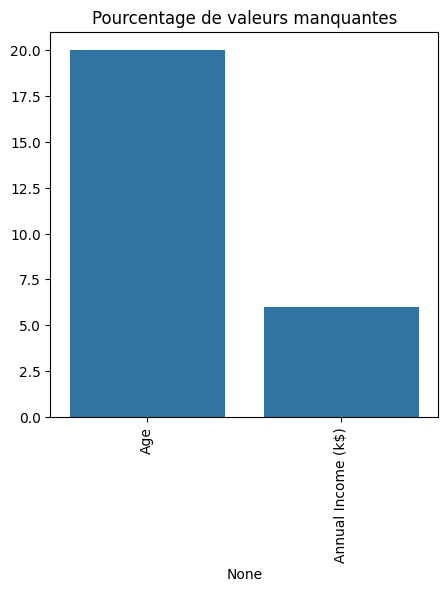

In [ ]:
# @title Vérifier s'il y a des valeurs manquantes (Graphique)
missing_values = df.isnull().sum() / len(df) * 100
missing_values = missing_values[missing_values > 0]
plt.figure(figsize=(5, 5))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title("Pourcentage de valeurs manquantes")
plt.show()

In [ ]:
# @title Traiter en les remplaçant par la médiane des valeurs existantes
# Remplacer les valeurs manquantes des colonnes numériques par la médiane
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()), axis=0)
df.isnull().sum()

,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


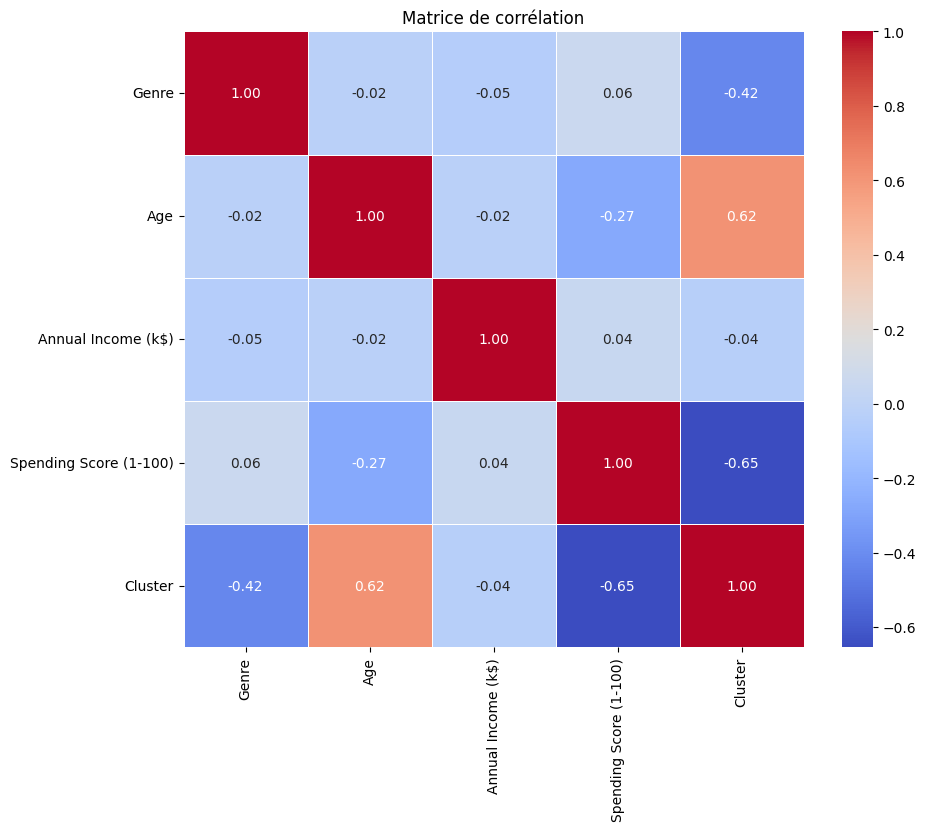

In [36]:
# @title Heatmap des corrélations
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Tracer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Ajouter un titre
plt.title("Matrice de corrélation")

plt.show()

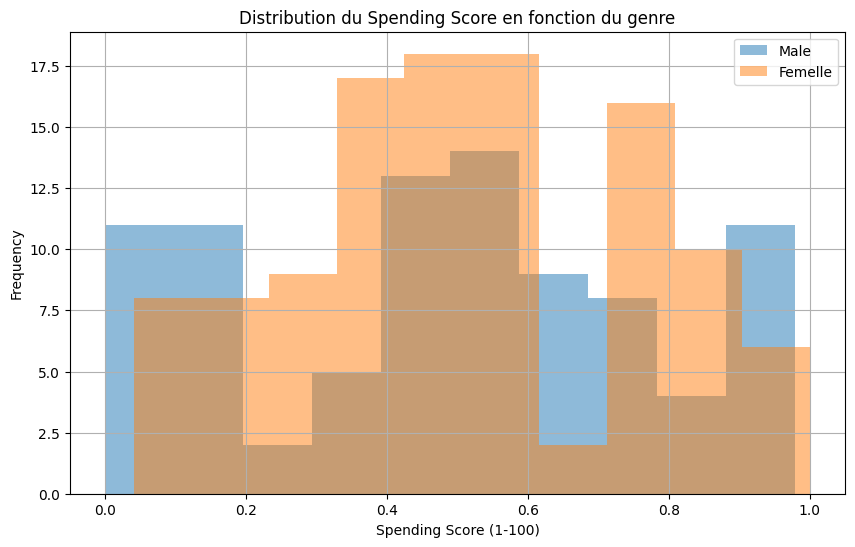

In [37]:
# @title Histogramme
plt.figure(figsize=(10,6))
df[df['Genre'] == 0]['Spending Score (1-100)'].hist(alpha=0.5, label='Male')
df[df['Genre'] == 1]['Spending Score (1-100)'].hist(alpha=0.5, label='Femelle')
plt.title('Distribution du Spending Score en fonction du genre')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

On peut voir que les femmes sont plus noubreuses à faire plus de depense que les hommes

## Normalisation des variables :

In [ ]:
# @title Normaliser les variables numériques afin d’assurer une bonne convergence de l’algorithme de clustering
# Sélection des colonnes numériques
numeric_cols = df.select_dtypes(include=['number']).columns

# Initialisation du scaler
scaler = MinMaxScaler()

# Transformation des colonnes numériques
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Vérification du résultat
print(df.head())

   Genre       Age  Annual Income (k$)  Spending Score (1-100)
0    0.0  0.019231            0.000000                0.387755
1    0.0  0.057692            0.000000                0.816327
2    1.0  0.038462            0.008197                0.051020
3    1.0  0.096154            0.008197                0.775510
4    1.0  0.250000            0.016393                0.397959


## 2. Visualisation des Données

Réaliser une analyse exploratoire à l’aide de graphiques :

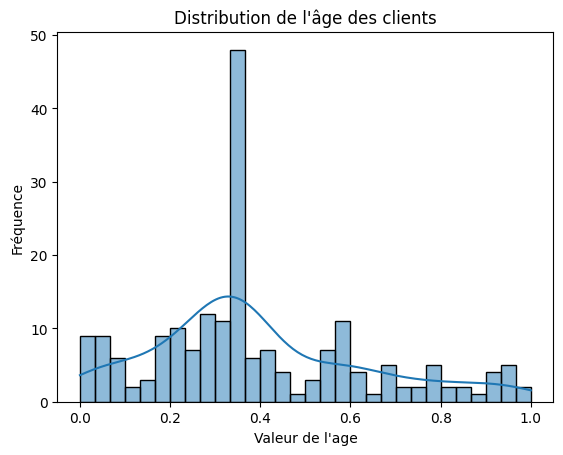

In [ ]:
# @title Tracer un histogramme de la distribution de l'âge des clients
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribution de l'âge des clients")
plt.xlabel("Valeur de l'âge")
plt.ylabel('Fréquence')
plt.show()

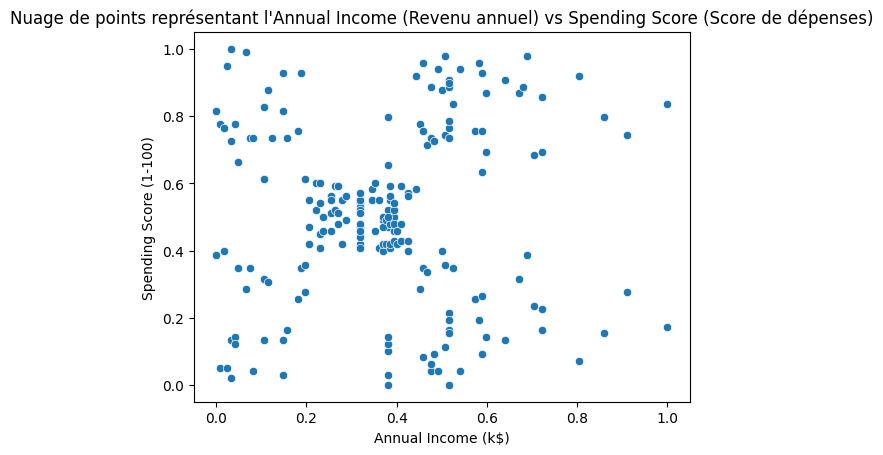

In [ ]:
# @title Créer un nuage de points (scatter plot) représentant l'Annual Income (Revenu annuel) vs Spending Score (Score de dépenses)
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])
plt.title("Nuage de points représentant l'Annual Income (Revenu annuel) vs Spending Score (Score de dépenses)")
plt.show()

## 3. Application du Clustering K-means

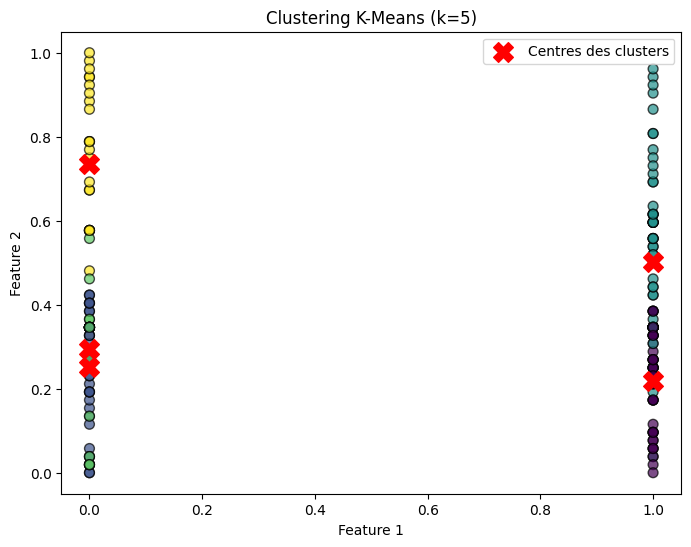

   Genre       Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    0.0  0.019231            0.000000                0.387755        1
1    0.0  0.057692            0.000000                0.816327        1
2    1.0  0.038462            0.008197                0.051020        2
3    1.0  0.096154            0.008197                0.775510        0
4    1.0  0.250000            0.016393                0.397959        2


In [ ]:
# @title Appliquer l'algorithme K-means au dataset avec un nombre de clusters k=5
X = df.select_dtypes(include=[np.number]).values  # Extraction des colonnes numériques

# Appliquer le clustering k-means avec k=5
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # `n_init=10` pour éviter un avertissement
kmeans.fit(X)

# Prédictions des clusters
y_kmeans = kmeans.predict(X)

# Ajouter les clusters au DataFrame
df["Cluster"] = y_kmeans



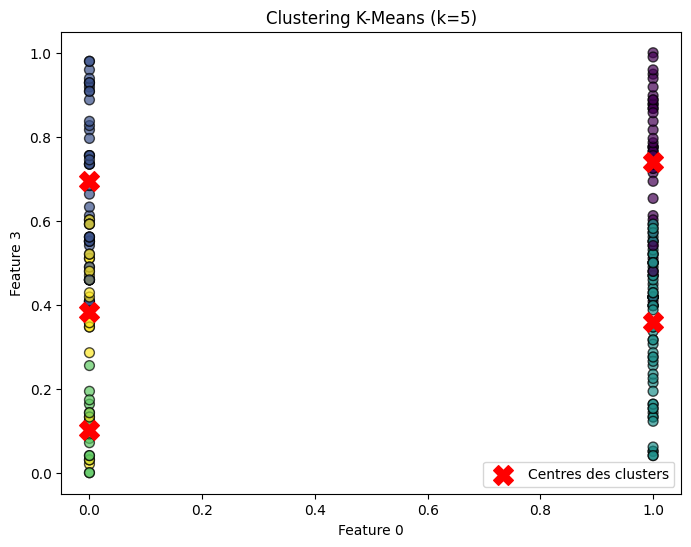

   Genre       Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    0.0  0.019231            0.000000                0.387755        1
1    0.0  0.057692            0.000000                0.816327        1
2    1.0  0.038462            0.008197                0.051020        2
3    1.0  0.096154            0.008197                0.775510        0
4    1.0  0.250000            0.016393                0.397959        2


In [ ]:
# @title Visualiser les clusters obtenus sur un graphique 2D avec Seaborn (en utilisant deux variables pertinentes)
# Visualisation des résultats (avec les deux premières features) 2D
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 3], c=y_kmeans, cmap='viridis', s=50, alpha=0.7, edgecolors='k')

# Ajout des centres des clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 3], c='red', s=200, marker='X', label="Centres des clusters")

# Titres et labels
plt.title("Clustering K-Means (k=5)")
plt.xlabel("Feature 0")
plt.ylabel("Feature 3")
plt.legend()
plt.show()

# Affichage des premiers résultats
print(df.head())

**Expliquer brièvement les résultats obtenus. Quels sont les patterns ou segments identifiés?**



Les deux variables pertinentes identifiées sont :

*   Genre
*   Spending Score (1-100)




Les colonnes (Genre, Age, Annual Income(k$), Spending Score (1-100)) correspondent respectivement au Feature 0, Feature 1, Feature 2, Feature 3. Dans le graphique on a 5 groupes puisque que k=5 mais on peut voir que les groupes se chevauchent un peu qui veut dire que la valeur de k devrait être plus petite. On peut voir 3 types de client pour les hommes et 2 types de client pour les femmes en terme de niveau de dépense



## 4. Interprétation des Résultats

### Décrire brièvement les clusters obtenus en termes de caractéristiques principales (ex : revenus, âges, score de dépenses).Quels segments de clients avez-vous identifiés ?


Les cluster que j'ai pu identifier demontre des caracteristiques par rapport au Spending Score. On peut voir que les clients males sont divisés en 3 groupes et les clients femelles en 2 groupes. C'est comme s'il y aurait des clients males qui depensent beaucoup, d'autres qui depenses dans la moyenne et d'autres qui ne depensent pas trop. Alors que pour les clients femelles on a un groupe qui depense beaucoup et un autre qui ne depense pas beaucoup.

### Comment ces informations pourraient-elles être utilisées dans une stratégie marketing ?
Une information pareille est cruciale pour l'equipe de marketing car ca va leur permettre d'envoyer des publicités ciblées à chacun de ces groupes. Deja selon ce que l'on voit ils devraient envoyer plus de publicités à leur groupe de clientele feminin et masculin qui depense beaucoup plus, car ces groupes sont plus aptent à faire plus de dépense que les groupes qui depensent moins. Envoyer aussi des publicités plus modeste aux groupes qui depensent le moins etc..

